In [1]:
#import Libraries
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd
import sklearn
import os
for dirname, _, filenames in os.walk("../output_data/framingham.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# read data farame

df = pd.read_csv("output_data/framingham.csv")
df.head(-1)

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,4236,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,4237,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,4238,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [3]:
#Cleaning up DataSet
# Check for Duplication
duplicate_df = df[df.duplicated()]
duplicate_df

# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

df.head(-1)

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,4233,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,4234,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,4238,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [4]:
# Check the data shape by rows vs columns
df.shape

(3658, 17)

In [11]:
#Replace index with ID
df1 = df.set_index("ID")

#Change floats to int
df1.loc[:, "BPMeds"] = df1.loc[:, "BPMeds"].astype("int")
df1.loc[:, "education"] = df1.loc[:, "education"].astype("int")
df1.loc[:, "cigsPerDay"] = df1.loc[:, "cigsPerDay"].astype("int")
df1.loc[:, "BPMeds"] = df1.loc[:, "BPMeds"].astype("int")
df1.loc[:, "totChol"] = df1.loc[:, "totChol"].astype("int")
df1.loc[:, "heartRate"] = df1.loc[:, "heartRate"].astype("int")
df1.loc[:, "glucose"] = df1.loc[:, "glucose"].astype("int")
df1.loc[:, "heartRate"] = df1.loc[:, "heartRate"].astype("int")
df1.dtypes

df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
ID,,,,,,,,,,,,,,,,
1,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [12]:
# Checking data types and description of all the Parameters after datacleaning step
df1.info()

df1.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   int32  
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int32  
 5   BPMeds           3658 non-null   int32  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int32  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int32  
 14  glucose          3658 non-null   int32  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int32(6), int64(7)
memory usage: 400.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
df2 = df1.rename(columns = {"male": "Gender","age": "Age","currentSmoker":"Current-Smoker",
                                           "cigsPerDay":"Cigarettes-Per-Day","education":"Education",
                                            "prevalentStroke":"Prevalent-Stroke","prevalentHyp":"Prevalent-Hyp",
                                           "diabetes":"Diabetes","totChol":"Total-Cholesterol",
                                           "sysBP":"Systolic-Blood-Pressure","BPMeds":"Blood-Pressure-Medication","diaBP":"Diastolic-Blood-Pressure",
                                           "heartRate":"Heart-Rate","glucose":"Glucose","TenYearCHD":"Ten-Year-CHD"})
df2["Gender"]= df2["Gender"].replace(1, "Male")
df2["Gender"]= df2["Gender"].replace(0, "Female")

df2.head(-1)

,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD
ID,,,,,,,,,,,,,,,,
1,Male,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
2,Female,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
3,Male,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
4,Female,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
5,Female,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,68,1,0,0,0,0,1,0,176,168.0,97.0,23.14,60,79,1
4234,Male,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4235,Male,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0


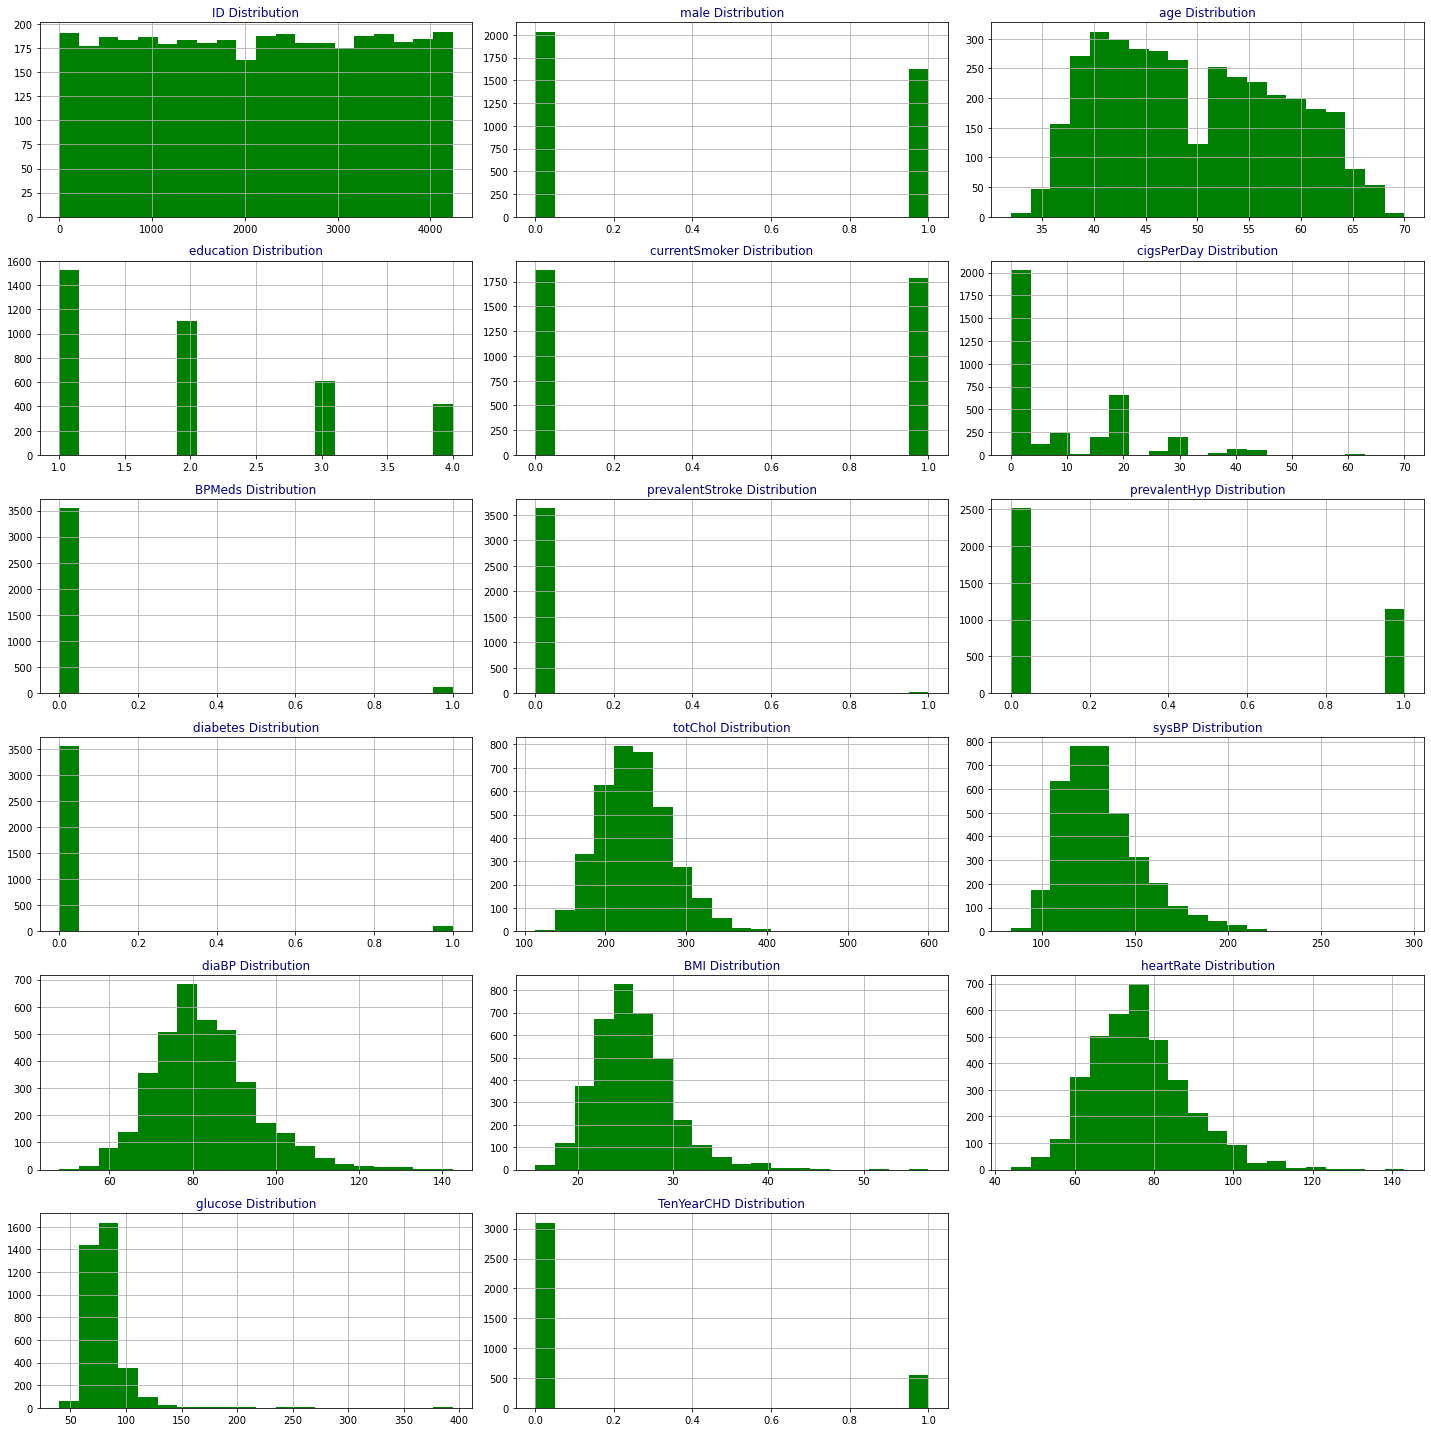

In [10]:
#Exploratory Analysis
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkBlue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [13]:
# Total number of different genders with CHD
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64